# Pymaceuticals Inc.
---

### Analysis

- The study shows that Capomulin and Ramicane work best at shrinking tumors, with fewer odd results compared to other treatments. The mice in the study had a good mix of males and females. Tumor size went down over time for a mouse treated with Capomulin, and heavier mice tended to have bigger tumors. Overall, Capomulin seems to be the most effective at stopping tumor growth.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID")


# Display the data for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice = len(df["Mouse ID"].unique())
print(f"Number of mice: {unique_mice}")

Number of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = df[df.duplicated(subset=["Mouse ID", "Timepoint"])]
print(f"Duplicate rows:{duplicates}")


Duplicate rows:     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26  


In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_unique_mice = len(df2["Mouse ID"].unique())
print(f"Mice after cleaning: {cleaned_unique_mice}")

Mice after cleaning: 248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
# Group the data by "Drug Regimen"
grouped_data = df2.groupby("Drug Regimen")
# Calculate each statistic
mean_tumor_volume = grouped_data["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_data["Tumor Volume (mm3)"].median()
variance = grouped_data["Tumor Volume (mm3)"].var()
std_dev = grouped_data["Tumor Volume (mm3)"].std()
sem = grouped_data["Tumor Volume (mm3)"].sem()
# Combine all statistics into a single summary 
summary = pd.DataFrame({
    "mean tumor volume": mean_tumor_volume,
    "median tumor volume": median_tumor_volume,
    "variance": variance,
    "std dev": std_dev,
    "sem": sem
})

print(summary)




              mean tumor volume  median tumor volume   variance   std dev  \
Drug Regimen                                                                
Capomulin             40.675741            41.557809  24.947764  4.994774   
Ceftamin              52.591172            51.776157  39.290177  6.268188   
Infubinol             52.884795            51.820584  43.128684  6.567243   
Ketapril              55.235638            53.698743  68.553577  8.279709   
Naftisol              54.331565            52.509285  66.173479  8.134708   
Placebo               54.033581            52.288934  61.168083  7.821003   
Propriva              52.320930            50.446266  43.852013  6.622085   
Ramicane              40.216745            40.673236  23.486704  4.846308   
Stelasyn              54.233149            52.431737  59.450562  7.710419   
Zoniferol             53.236507            51.818479  48.533355  6.966589   

                   sem  
Drug Regimen            
Capomulin     0.329346  


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

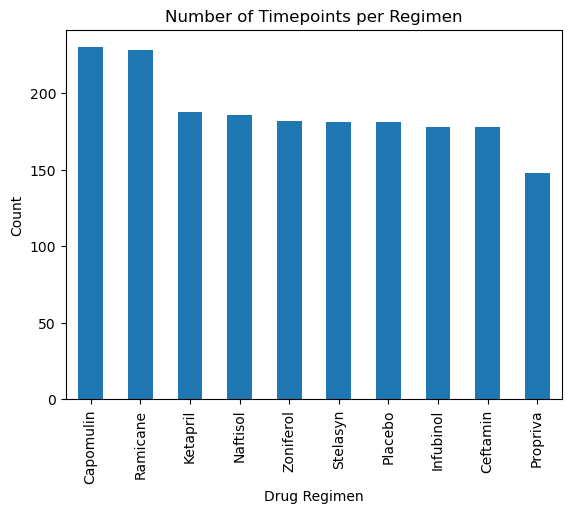

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_counts = df2["Drug Regimen"].value_counts()
mouse_counts.plot.bar(title="Number of Timepoints per Regimen", xlabel="Drug Regimen", ylabel="Count")
plt.show()

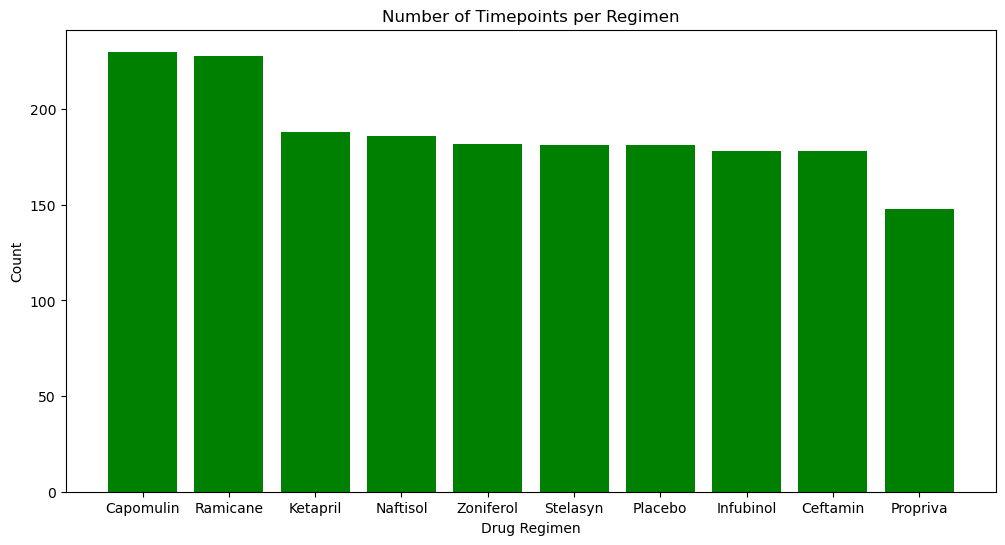

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(12, 6)) 
plt.bar(mouse_counts.index, mouse_counts.values, width = 0.8, color='green')

# Adding titles and labels
plt.title("Number of Timepoints per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

# Displaying the plot
plt.show()

<Axes: title={'center': 'Gender Distribution of Mice'}, ylabel='count'>

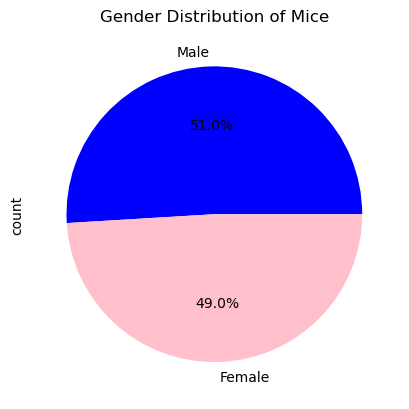

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
sex_counts = df2.drop_duplicates()["Sex"].value_counts()
# setting colors
colors = ["blue","pink"]
sex_counts.plot.pie(autopct="%1.1f%%",  title="Gender Distribution of Mice", colors = colors)

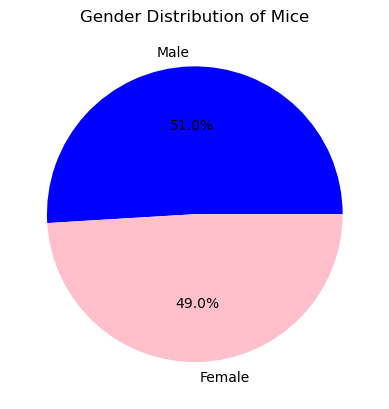

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
colors = ["blue","pink"]
plt.pie(sex_counts.values, labels=sex_counts.index, autopct="%1.1f%%", colors = colors)
plt.title("Gender Distribution of Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = df[df["Drug Regimen"].isin(treatments)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_data = pd.merge(last_timepoints, df, on=["Mouse ID", "Timepoint"])
final_tumor_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes_list = []

for treatment in treatments:
    # Locate rows for the specific treatment and extract tumor volumes
    tumor_volumes = final_tumor_data.loc[final_tumor_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volumes_list.append(tumor_volumes)
    
    # calculate iqr
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper - lower

    #  bounds for outliers
    lower_bound = lower - (1.5 * iqr)
    upper_bound = upper + (1.5 * iqr)

    # Identify outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results for each treatment
    print(f"{treatment}:")
    print(f"   Lower Quartile: {lower}")
    print(f"   Upper Quartile: {upper}")
    print(f"   IQR: {iqr}")
    print(f"   Lower Bound: {lower_bound}")
    print(f"   Upper Bound: {upper_bound}")
    print(f"   Potential Outliers: {outliers.tolist()}")


Capomulin:
   Lower Quartile: 32.37735684
   Upper Quartile: 40.1592203
   IQR: 7.781863460000004
   Lower Bound: 20.70456164999999
   Upper Bound: 51.83201549
   Potential Outliers: []
Ramicane:
   Lower Quartile: 31.56046955
   Upper Quartile: 40.65900627
   IQR: 9.098536719999998
   Lower Bound: 17.912664470000003
   Upper Bound: 54.30681135
   Potential Outliers: []
Infubinol:
   Lower Quartile: 54.04860769
   Upper Quartile: 65.52574285
   IQR: 11.477135160000003
   Lower Bound: 36.83290494999999
   Upper Bound: 82.74144559000001
   Potential Outliers: [36.3213458]
Ceftamin:
   Lower Quartile: 48.72207785
   Upper Quartile: 64.29983003
   IQR: 15.577752179999997
   Lower Bound: 25.355449580000002
   Upper Bound: 87.66645829999999
   Potential Outliers: []


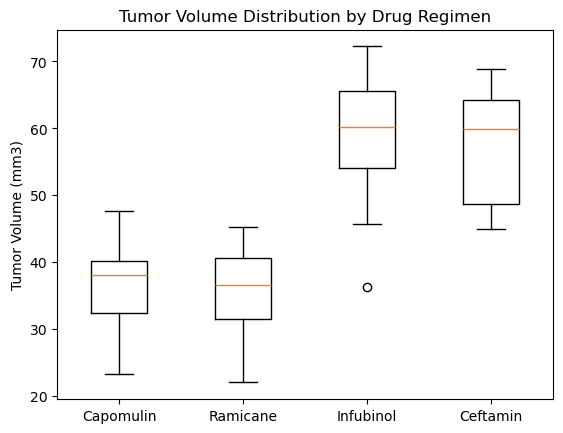

In [17]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
plt.boxplot(tumor_volumes_list, tick_labels=treatments)
plt.title("Tumor Volume Distribution by Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

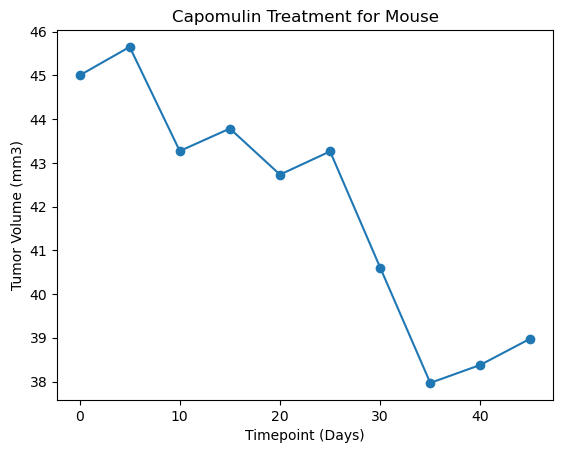

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse = df2[(df2["Drug Regimen"] == "Capomulin") & (df2["Mouse ID"] == "b128")]
plt.plot(selected_mouse["Timepoint"], selected_mouse["Tumor Volume (mm3)"], marker="o")
plt.title("Capomulin Treatment for Mouse")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
#this one was very confusing for me

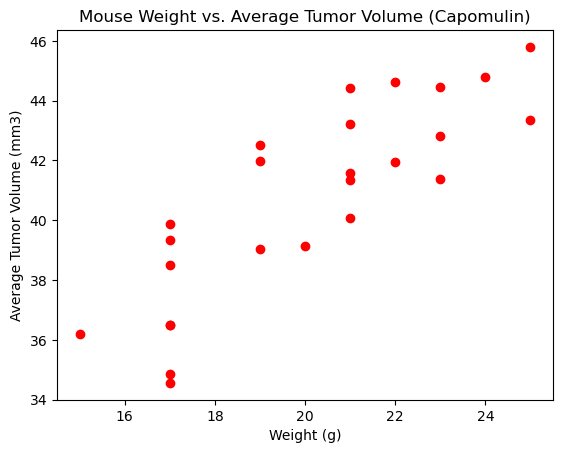

In [21]:

capomulin = df2[df2["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean(numeric_only=True)

# Generate the scatter plot
plt.scatter(capomulin["Weight (g)"], capomulin["Tumor Volume (mm3)"], color="red")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

Correlation coefficient: 0.841936342469472


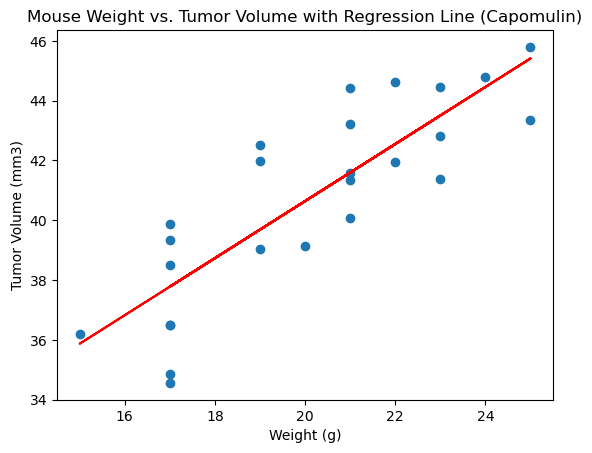

In [22]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
if len(capomulin["Weight (g)"].unique()) > 1 and len(capomulin["Tumor Volume (mm3)"].unique()) > 1:
    corr = st.pearsonr(capomulin["Weight (g)"], capomulin["Tumor Volume (mm3)"])
    print(f"Correlation coefficient: {corr[0]}")
else:
    print("Cannot calculate correlation: one of the inputs is constant.")
# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin["Weight (g)"], capomulin["Tumor Volume (mm3)"])
# Generate the regression line plot
plt.scatter(capomulin["Weight (g)"], capomulin["Tumor Volume (mm3)"])
plt.plot(capomulin["Weight (g)"], slope * capomulin["Weight (g)"] + intercept, color="red")
plt.title("Mouse Weight vs. Tumor Volume with Regression Line (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()